In [11]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [12]:
df=pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [13]:
df.shape

(1303, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.isnull().sum()


,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [17]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [18]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [19]:
df['Ram'].str.replace('GB','')

,Ram
0,8
1,8
2,8
3,16
4,8
...,...
1298,4
1299,16
1300,2
1301,6


In [20]:
df['Weight'].str.replace('kg','')

,Weight
0,1.37
1,1.34
2,1.86
3,1.83
4,1.37
...,...
1298,1.8
1299,1.3
1300,1.5
1301,2.19


In [21]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


/tmp/ipython-input-23-2289912046.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])  #data is skewed


<Axes: xlabel='Price', ylabel='Density'>

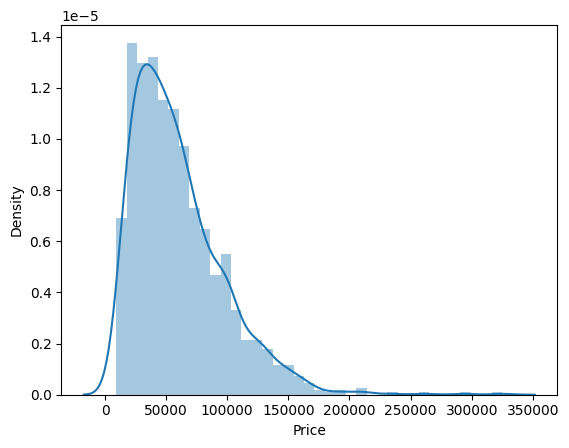

In [23]:
#eda
sns.distplot(df['Price'])  #data is skewed

<Axes: xlabel='Company'>

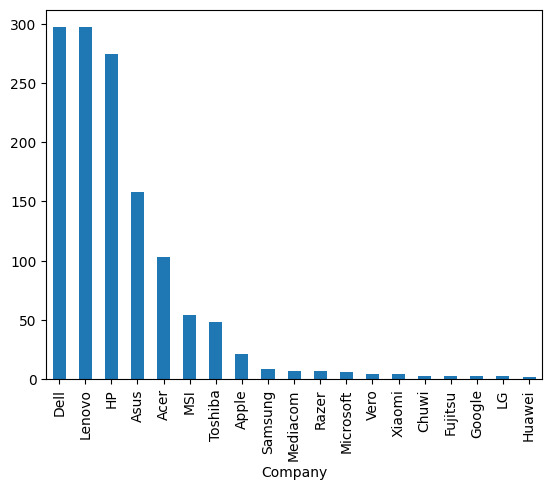

In [24]:
df['Company'].value_counts().plot(kind='bar')

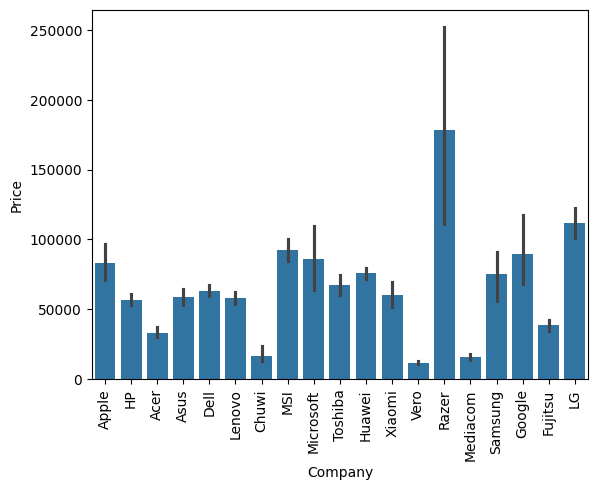

In [25]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


<Axes: xlabel='TypeName'>

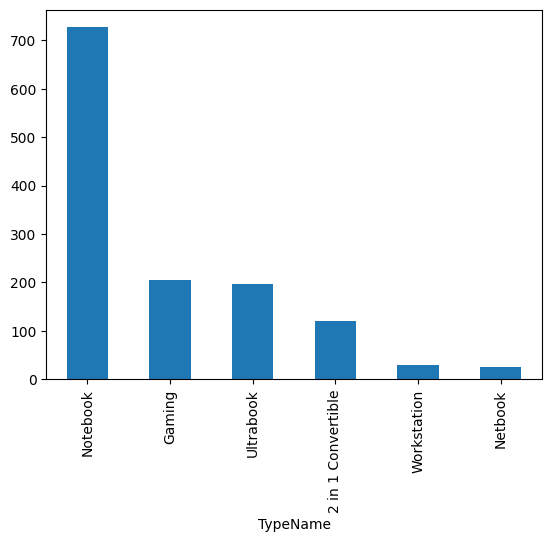

In [26]:
df['TypeName'].value_counts().plot(kind='bar')

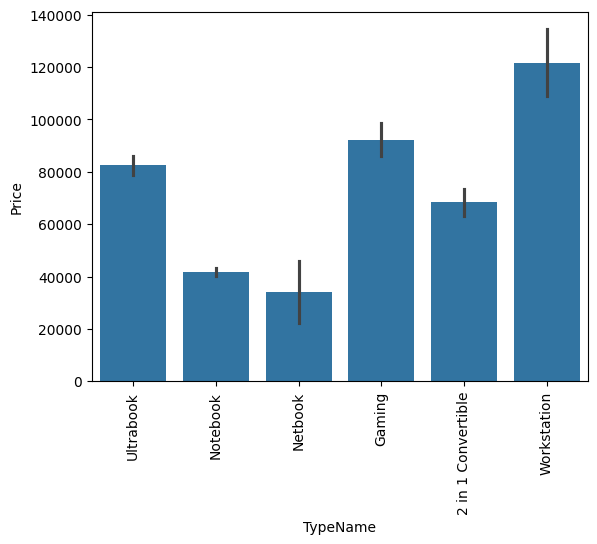

In [27]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

/tmp/ipython-input-28-1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

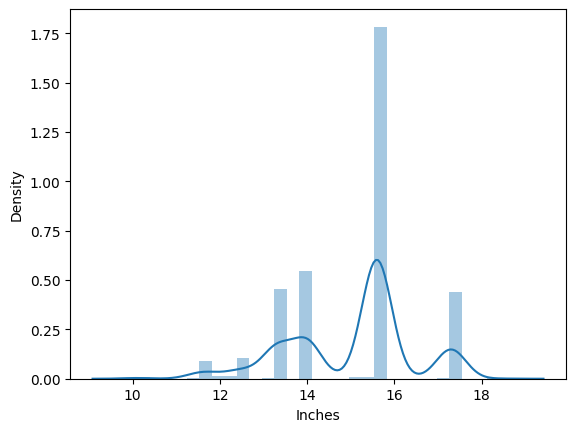

In [28]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

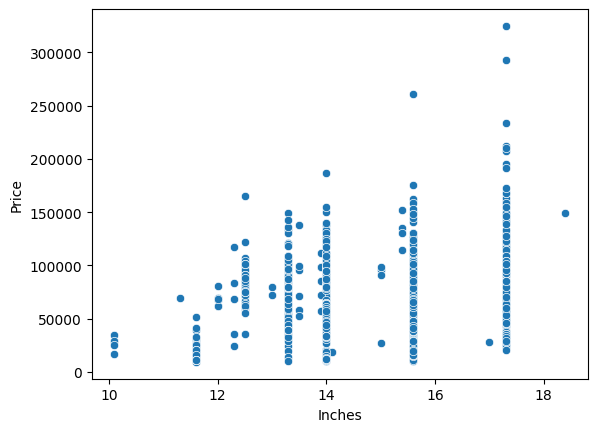

In [29]:
sns.scatterplot(x='Inches',y='Price',data=df)

In [30]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [31]:
df['touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [32]:
df['touchscreen'].value_counts()

,count
touchscreen,
0,1111
1,192


<Axes: xlabel='touchscreen', ylabel='Price'>

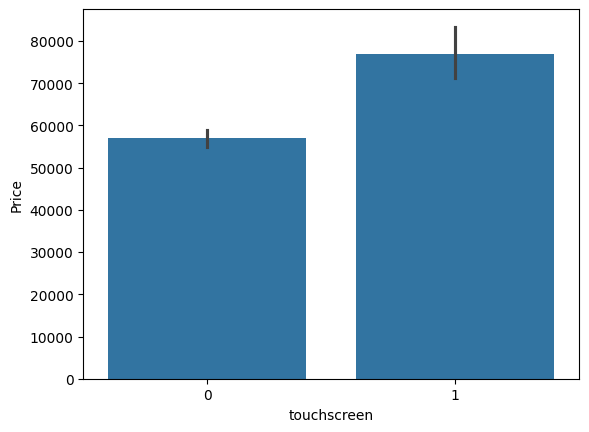

In [33]:
sns.barplot(x=df['touchscreen'],y=df['Price'])

<Axes: xlabel='ips', ylabel='Price'>

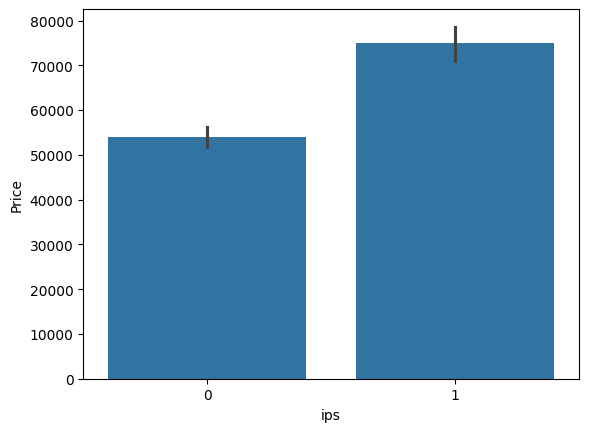

In [34]:
sns.barplot(x=df['ips'],y=df['Price'])


In [35]:
df['ScreenResolution'].str.split('x',expand=True)
df['x_res']=df['ScreenResolution'].str.split('x',expand=True)[0]
df['y_res']=df['ScreenResolution'].str.split('x',expand=True)[1]

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [37]:
df['x_res']=df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [38]:
df['x_res']=df['x_res'].astype('int')
df['y_res']=df['y_res'].astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  touchscreen       1303 non-null   int64  
 12  ips               1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


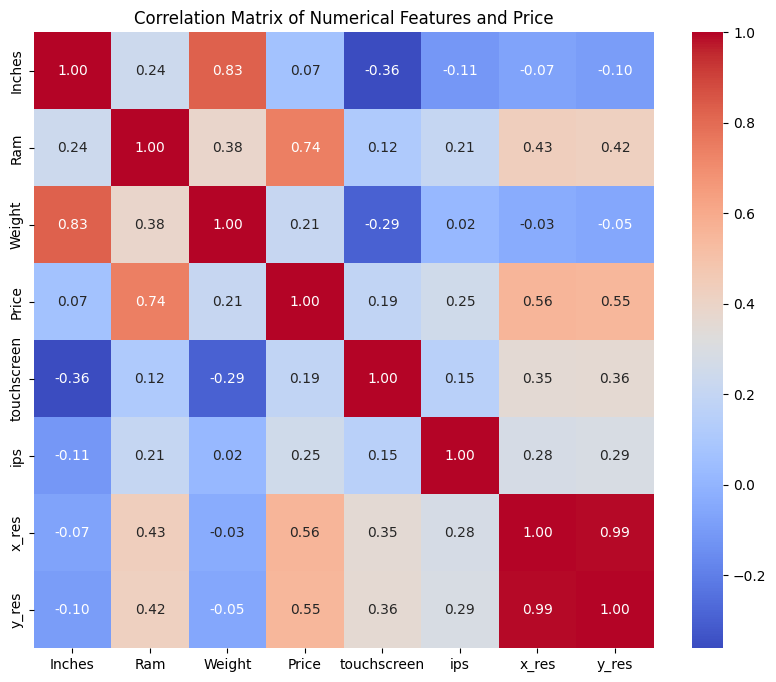

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Price')
plt.show()

In [41]:
#ppi coloumn making
df['ppi']=((df['x_res']**2)+(df['y_res']**2))**0.5/df['Inches'].astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,ips,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [42]:
df.drop(columns=['x_res','y_res','ScreenResolution','Inches'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [43]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core i5 7200U 2.70GHz,1
Intel Core M M7-6Y75 1.2GHz,1
Intel Core M 6Y54 1.1GHz,1


In [44]:
df['cpuname']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,ips,ppi,cpuname
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [45]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
      if text.split()[0]=='Intel':
        return 'Other Intel Processor'
      else:
        return 'AMD Processor'

In [46]:
df['cpu brand']=df['cpuname'].apply(fetch_processor)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,ips,ppi,cpuname,cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='cpu brand'>

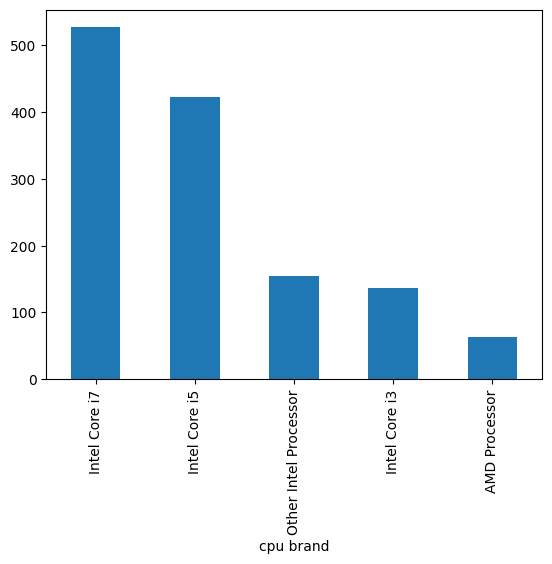

In [47]:
df['cpu brand'].value_counts().plot(kind='bar')

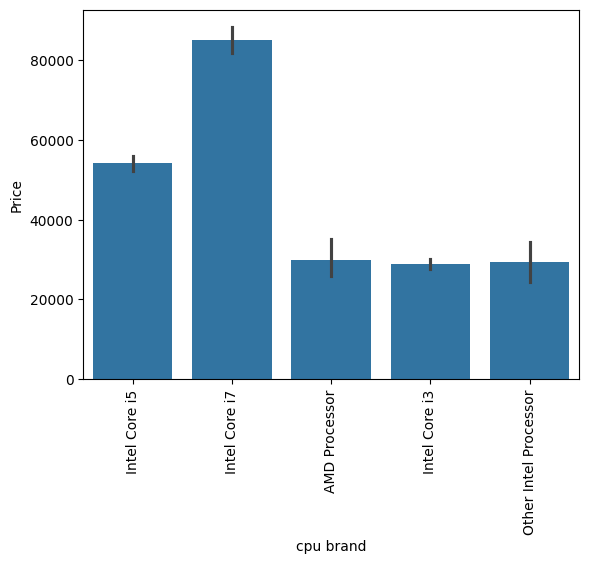

In [48]:
sns.barplot(x=df['cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
df.drop(columns=['Cpu','cpuname'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,ips,ppi,cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

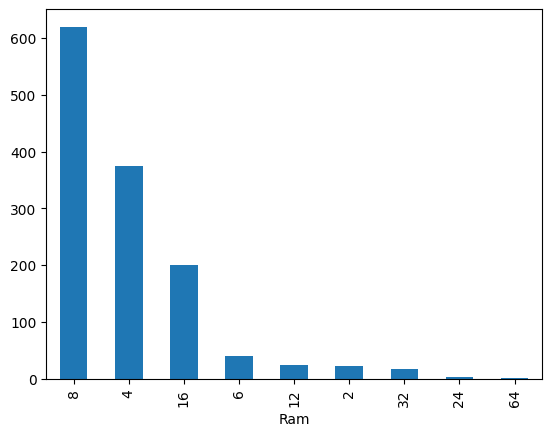

In [50]:
df['Ram'].value_counts().plot(kind='bar')

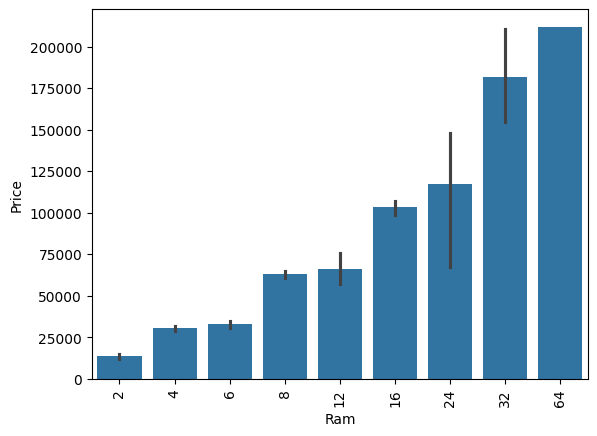

In [51]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df['Memory'].value_counts()


,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [53]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract only the numeric part using str.extract
df['first'] = df['first'].str.extract('(\d+)').astype(int)

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract only the numeric part using str.extract
df['second'] = df['second'].str.extract('(\d+)').fillna(0).astype(int)


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

/tmp/ipython-input-53-4288159672.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [54]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,ips,ppi,cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [55]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,ips,ppi,cpu brand,HDD,SSD
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [56]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [57]:
df['gpubrand']=df['Gpu'].apply(lambda x:x.split())
df['gpubrand']=df['gpubrand'].apply(lambda x:x[0])
df.head()



,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,ips,ppi,cpu brand,HDD,SSD,gpubrand
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [58]:
df['gpubrand'].value_counts()

,count
gpubrand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [59]:
df=df[df['gpubrand'] != 'ARM']


In [60]:
df['gpubrand'].value_counts()

,count
gpubrand,
Intel,722
Nvidia,400
AMD,180


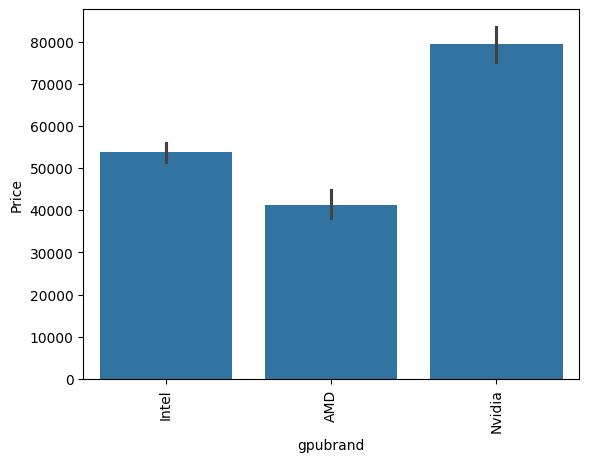

In [61]:
sns.barplot(x=df['gpubrand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
df.drop(columns=['Gpu'],inplace=True)

In [63]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,touchscreen,ips,ppi,cpu brand,HDD,SSD,gpubrand
0,Apple,Ultrabook,8,128 SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,128 Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,256 SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,512 SSD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,256 SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [64]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


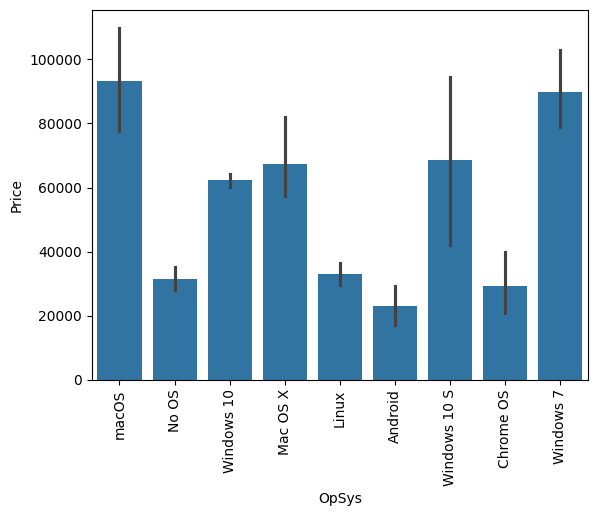

In [65]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
def catos(text):
  if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
    return 'Windows'
  elif text=='macOS' or text=='Mac OS X':
    return 'Mac'
  else:
    return 'Others/NO OS/linux'

In [67]:
df['OpSysbrand']=df['OpSys'].apply(catos)
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,touchscreen,ips,ppi,cpu brand,HDD,SSD,gpubrand,OpSysbrand
0,Apple,Ultrabook,8,128 SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,128 Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,256 SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/NO OS/linux
3,Apple,Ultrabook,16,512 SSD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,256 SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [68]:
df.drop(columns=['OpSys','Memory'],inplace=True)

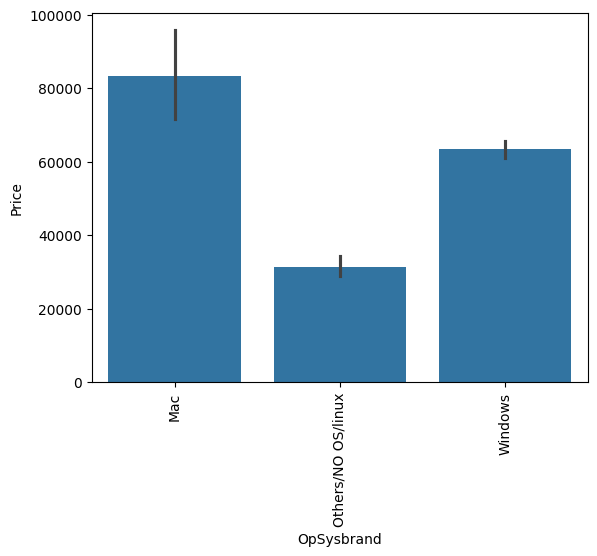

In [69]:
sns.barplot(x=df['OpSysbrand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

/tmp/ipython-input-70-1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

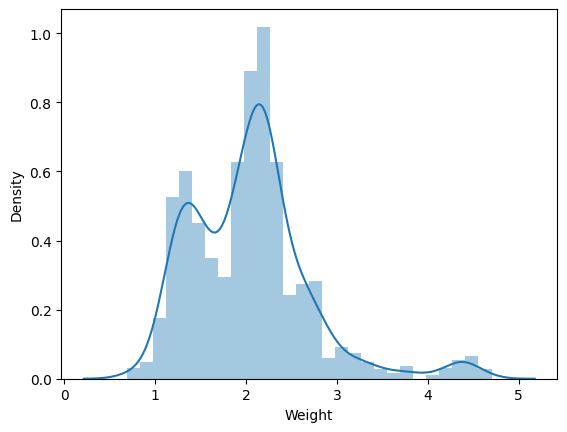

In [70]:
sns.distplot(df['Weight'])

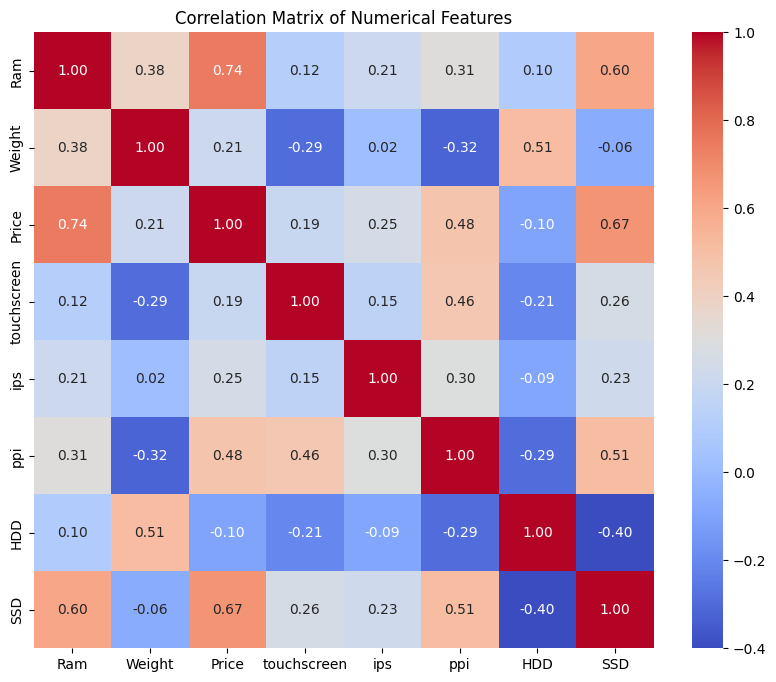

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['Company', 'TypeName', 'cpu brand', 'gpubrand', 'OpSysbrand']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

/tmp/ipython-input-72-3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

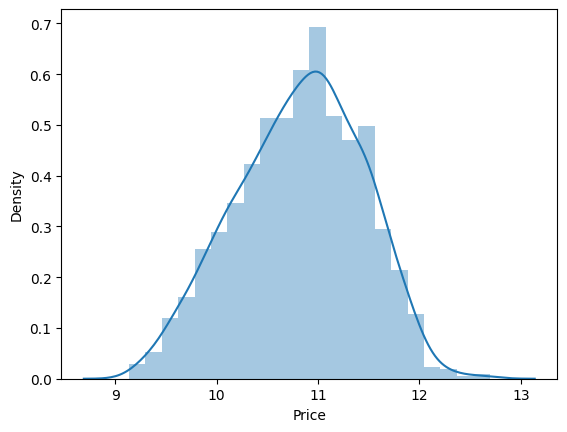

In [72]:
sns.distplot(np.log(df['Price']))

In [73]:
x=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [74]:
x

,Company,TypeName,Ram,Weight,touchscreen,ips,ppi,cpu brand,HDD,SSD,gpubrand,OpSysbrand
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/NO OS/linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [75]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [77]:
#handling categorical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error

In [78]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [79]:
step1=ColumnTransformer(transformers=[
    ('cat_encoder', OneHotEncoder(drop='first', handle_unknown='ignore'),[1,0,7,10,11] )
], remainder='passthrough') # 'remainder' will pass through all columns NOT specified in transformers

step2=LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8427774593176955
MAE 0.1945663216958389


In [80]:
step1=ColumnTransformer(transformers=[('coltnf',OneHotEncoder(drop='first', handle_unknown='ignore'),[0,1,7,10,11])],
                  remainder='passthrough')
step2=Lasso()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.4946621059158952
MAE 0.3644162445864669


In [81]:
step1=ColumnTransformer(transformers=[('coltnf',OneHotEncoder(drop='first', handle_unknown='ignore'),[0,1,7,10,11])],
                  remainder='passthrough')
step2=Ridge()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8421487010298822
MAE 0.19511006857626495


In [82]:
step1=ColumnTransformer(transformers=[('coltnf',OneHotEncoder(drop='first', handle_unknown='ignore'),[0,1,7,10,11])],
                  remainder='passthrough')
step2=KNeighborsRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7392010553289055
MAE 0.2348627357405678


In [83]:
step1=ColumnTransformer(transformers=[('coltnf',OneHotEncoder(drop='first', handle_unknown='ignore'),[0,1,7,10,11])],
                  remainder='passthrough')
step2=DecisionTreeRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8204330617357363
MAE 0.19495772994235233


In [84]:
step1=ColumnTransformer(transformers=[('coltnf',OneHotEncoder(drop='first', handle_unknown='ignore'),[0,1,7,10,11])],
                  remainder='passthrough')
step2=RandomForestRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8895018393752605
MAE 0.1571804508419736


In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import numpy as np # Import numpy for dropping columns robustly
import pandas as pd # Import pandas

# Drop the 'Memory' column if it exists (check needed as it might have been dropped before)
if 'Memory' in x_train.columns:
    x_train = x_train.drop(columns=['Memory'])
if 'Memory' in x_test.columns:
    x_test = x_test.drop(columns=['Memory'])

# Define the ColumnTransformer with column names
categorical_features = ['Company', 'TypeName', 'cpu brand', 'gpubrand', 'OpSysbrand']
# Identify numerical features dynamically or list them explicitly if preferred
numerical_features = x_train.select_dtypes(include=np.number).columns.tolist()
# Ensure categorical features are not in numerical features list
numerical_features = [col for col in numerical_features if col not in categorical_features]


step1=ColumnTransformer(transformers=[
    ('cat_encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
], remainder='passthrough') # 'remainder' will pass through all columns NOT specified in transformers

# Define the model
step2=RandomForestRegressor()

# Create the pipeline
pipe=Pipeline([('step1',step1),('step2',step2)])

# Define the parameter grid for the model WITHIN the pipeline
param_grid = {'step2__n_estimators':[100,200,300],
              'step2__criterion':['squared_error'],
              'step2__max_depth':[3,2,4],
              'step2__min_samples_split':[2,3,4],
              'step2__min_samples_leaf':[1,2,3]}

# Create and fit the GridSearchCV
# Change scoring to 'neg_mean_absolute_error' or 'r2' for regression
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1) # Using r2 scoring and n_jobs=-1 for faster processing
grid_search.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)

# Evaluate on the test set
y_pred = grid_search.predict(x_test)
print('R2 score on test set',r2_score(y_test,y_pred))
print('MAE on test set',mean_absolute_error(y_test,y_pred))

Best parameters: {'step2__criterion': 'squared_error', 'step2__max_depth': 4, 'step2__min_samples_leaf': 3, 'step2__min_samples_split': 2, 'step2__n_estimators': 100}
Best R2 score: 0.7943399331098189
R2 score on test set 0.8044348649367505
MAE on test set 0.2189113042698377


In [86]:
step1=ColumnTransformer(transformers=[('coltnf',OneHotEncoder(drop='first', handle_unknown='ignore'),[0,1,7,10,11])],
                  remainder='passthrough')
step2=GradientBoostingRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8794661358141509
MAE 0.1665313637468511


In [87]:
step1=ColumnTransformer(transformers=[('coltnf',OneHotEncoder(drop='first', handle_unknown='ignore'),[0,1,7,10,11])],
                  remainder='passthrough')
step2=XGBRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9004418046302418
MAE 0.15193569690384084


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import numpy as np # Import numpy for robust column selection
import pandas as pd # Import pandas for column manipulation

# Drop the 'Memory' column if it exists (check needed as it might have been dropped before)
if 'Memory' in x_train.columns:
    x_train = x_train.drop(columns=['Memory'])
if 'Memory' in x_test.columns:
    x_test = x_test.drop(columns=['Memory'])

# Define the ColumnTransformer with column names
categorical_features = ['Company', 'TypeName', 'cpu brand', 'gpubrand', 'OpSysbrand']
# Identify numerical features dynamically or list them explicitly if preferred
numerical_features = x_train.select_dtypes(include=np.number).columns.tolist()
# Ensure categorical features are not in numerical features list
numerical_features = [col for col in numerical_features if col not in categorical_features]

step1 = ColumnTransformer(transformers=[
    ('cat_encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
], remainder='passthrough') # 'remainder' will pass through all columns NOT specified in transformers

# Define the model
step2 = XGBRegressor()

# Create the pipeline
pipe = Pipeline([('step1', step1), ('step2', step2)])

# Define the parameter grid for the model WITHIN the pipeline
param_grid = {
    'step2__n_estimators': [100, 200,300,400,500],
    'step2__learning_rate': [0.01, 0.1, 0.2],
    'step2__max_depth': [3, 4, 5,6,7,8,9,10],
    'step2__subsample': [0.7, 1.0],
    'step2__colsample_bytree': [0.7, 1.0]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=pipe, # Use the pipeline here
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(x_train, y_train)

# Best model (which is the fitted pipeline with the best XGBoost parameters)
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(x_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("R2 Score:", r2)
print("MAE:", mean_absolute_error(y_test, y_pred))

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Parameters: {'step2__colsample_bytree': 0.7, 'step2__learning_rate': 0.1, 'step2__max_depth': 8, 'step2__n_estimators': 100, 'step2__subsample': 0.7}
R2 Score: 0.9063920712323216
MAE: 0.14415164663751376


In [89]:
step1=ColumnTransformer(transformers=[('coltnf',OneHotEncoder(drop='first', handle_unknown='ignore'),[0,1,7,10,11])],
                  remainder='passthrough')
step2=RandomForestRegressor(n_estimators=400,criterion='squared_error',max_depth=13,min_samples_leaf=2,min_samples_split=2)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8897768234788762
MAE 0.15873918201469822


In [92]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))

In [93]:
df.to_csv('refined_data.csv', index=False)



In [94]:
from google.colab import files
files.download('refined_data.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>